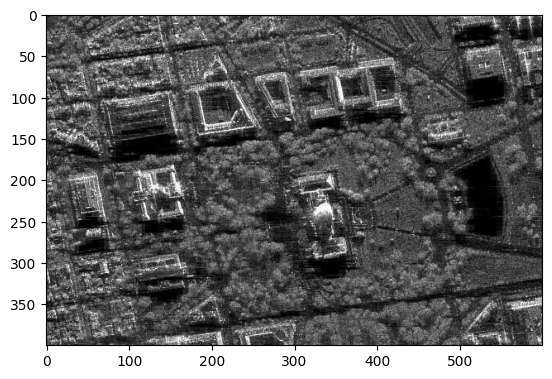

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('sar_1_gray.jpg')

plt.imshow(image)

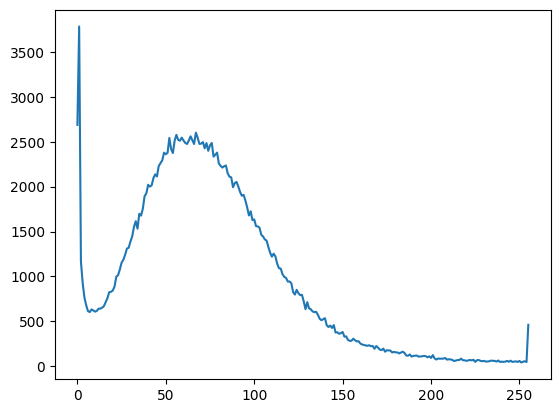

In [2]:
histSize = 256
histRange = (0, 256)
accumulate = False

b_hist = cv2.calcHist([image], [0], None, [histSize], histRange)

plt.plot(b_hist)

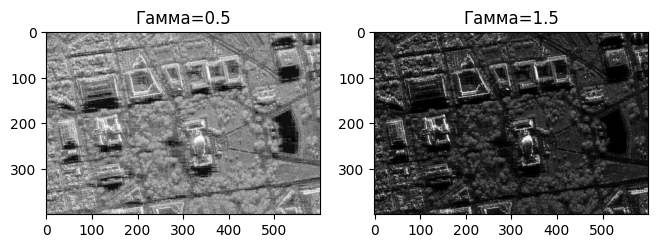

In [3]:
def gamma_correction(image, gamma=1.0):
    image_normalized = image.astype(np.float32) / 255.0
    
    corrected_image = np.power(image_normalized, gamma)
    
    corrected_image = (corrected_image * 255).astype(np.uint8)
    
    return corrected_image

image = cv2.imread('sar_1_gray.jpg') 

plt.figure(figsize=(12, 4))
gamma_05 = gamma_correction(image, gamma=0.5)
plt.subplot(1, 3, 1)
plt.title('Гамма=0.5')
plt.imshow(gamma_05) 
gamma_15 = gamma_correction(image, gamma=1.5)
plt.subplot(1, 3, 2)
plt.title('Гамма=1.5')
plt.imshow(gamma_15)
plt.show()

In [8]:
from skimage.metrics import structural_similarity, mean_squared_error

min_side = min(image.shape)
win_size = min(7, min_side)  
if win_size % 2 == 0:  
    win_size -= 1
if win_size < 3:  
    win_size = 3


(ssim_15, diff) = structural_similarity(image, gamma_15, win_size=win_size, full=True)
(ssim_05, diff) = structural_similarity(image, gamma_05, win_size=win_size, full=True)

mse_05 = mean_squared_error(image, gamma_05)
mse_15 = mean_squared_error(image, gamma_15)

print(f"Гамма=0.5: MSE={mse_05:.2f}, SSIM={ssim_05:.4f}")
print(f"Гамма=1.5: MSE={mse_15:.2f}, SSIM={ssim_15:.4f}")


Гамма=0.5: MSE=3250.43, SSIM=0.7736
Гамма=1.5: MSE=971.82, SSIM=0.7868


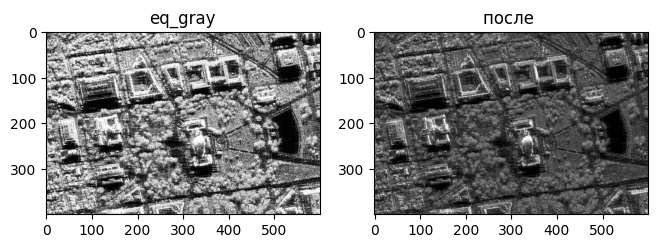

In [5]:

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image = gray_image.astype(np.uint8)
eq_gray = cv2.equalizeHist(gray_image)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.title('eq_gray')
plt.imshow(eq_gray, cmap="gray")

plt.subplot(1, 3, 2)
plt.title('после ')
plt.imshow(gray_image, cmap="gray")

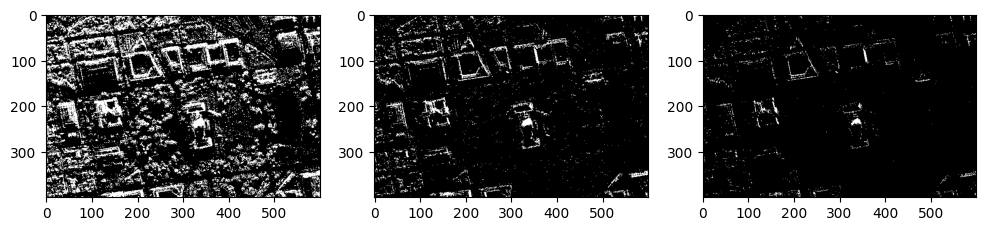

In [6]:
_,thresh1 = cv2.threshold(image,200,255,cv2.THRESH_BINARY)
_, thresh_100 = cv2.threshold(image, 100, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(thresh_100, cmap='gray')
_, thresh_150 = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)
plt.subplot(1, 3, 2)
plt.imshow(thresh_150, cmap='gray')
_, thresh_200 = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY)
plt.subplot(1, 3, 3)
plt.imshow(thresh_200, cmap='gray')
